# Kaggle Competition 활동하기

주제 : Store Sales - Time Series Forecasting
Use machine learning to predict grocery sales


1. 라이브러리 import 하기

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

2. null value 유무 확인하기

In [2]:
df = pd.read_csv('train.csv')
nullSum = df.isnull().sum()
print(nullSum)

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [3]:
df = pd.read_csv('test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [3]:
df = pd.read_csv('stores.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [4]:
df = pd.read_csv('oil.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [5]:
df = pd.read_csv('transactions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


null_value는 보이지 않는다

3. 데이터 시각화하기

In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
trans = pd.read_csv('transactions.csv')
df_oil = pd.read_csv('oil.csv')
df_store = pd.read_csv('stores.csv')
df_holiday = pd.read_csv('holidays_events.csv')

날짜를 datetime 데이터타입으로 바꿔준다.

In [10]:
df_train["date"] = pd.to_datetime(df_train.date)
df_test["date"] = pd.to_datetime(df_test.date)
trans["date"] = pd.to_datetime(trans.date)
df_oil["date"] = pd.to_datetime(df_oil.date)
df_store.cluster = df_store.cluster.astype("int8")

train 파일의 매출 데이터를 그래프를 통해 시각화한다.

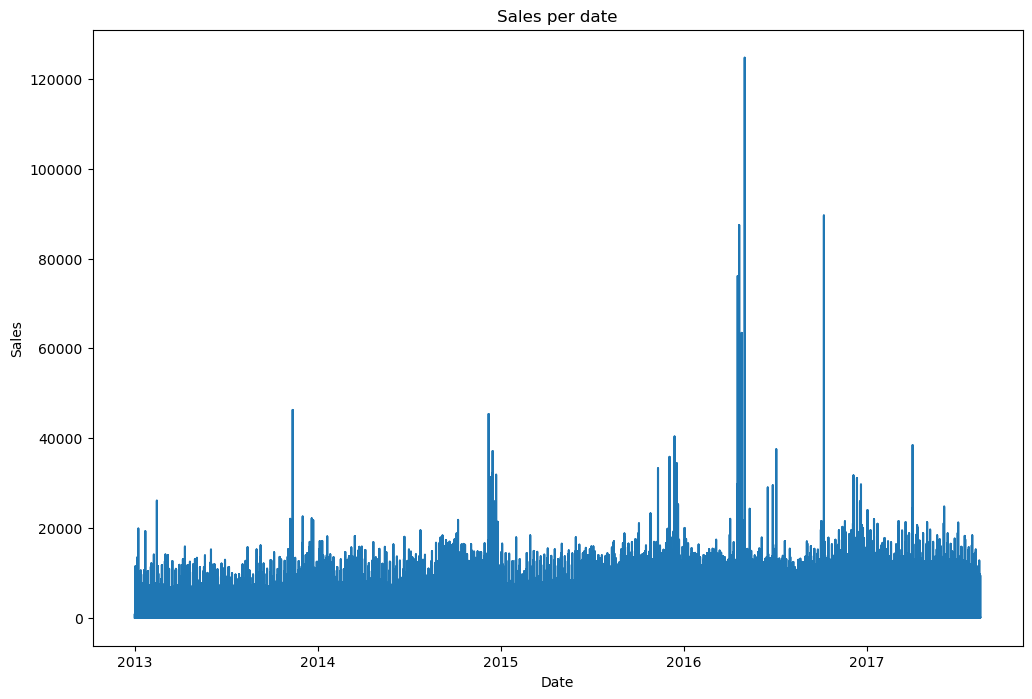

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(df_train['date'], df_train['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Sales per date")
plt.show()

이번엔 transaction 데이터를 시각화한다.

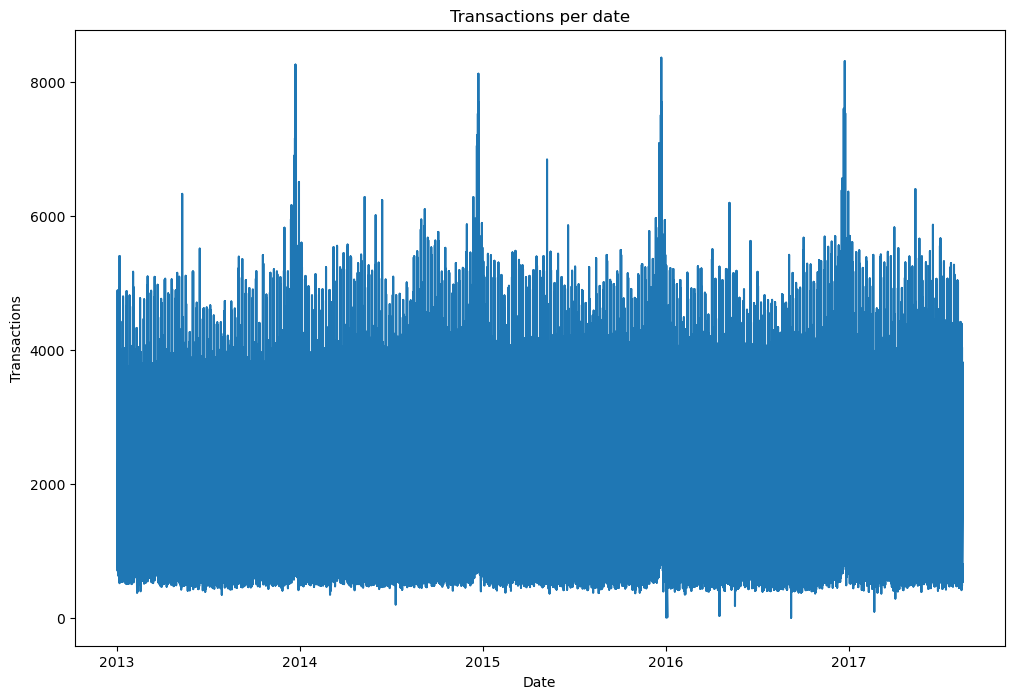

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(trans['date'], trans['transactions'])
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title("Transactions per date")
plt.show()

두 그래프 모두 평균 20000 이하 매출 결과가 나오다가 어느 순간 매출이 올라가는 것을 볼 수 있다. (Holiday 데이터 중요!)

비율 척도의 변수가 들어가기 때문에 피어슨 상관분석을 통해 두 데이터에 대한 연관성 분석을 해야 한다. 하지만, 두 데이터셋의 크기가 다르기에 월별로 매출, 거래량을 합하여 상관관계를 구한다.

In [13]:

trans_copy = trans.copy()
trans_copy["year"] = trans_copy.date.dt.year
trans_copy["month"] = trans_copy.date.dt.month
df_train_copy = df_train.copy()
df_train_copy["year"] = df_train_copy.date.dt.year
df_train_copy["month"] = df_train_copy.date.dt.month
df_train_copy.sales = df_train_copy.sales.astype("int8")
grouped_train = df_train_copy.groupby(['year', 'month'])['sales'].sum().reset_index()
train_list = grouped_train.sort_values(['year', 'month'])['sales'].tolist()
grouped_trans = trans_copy.groupby(['year', 'month'])['transactions'].sum().reset_index()
trans_list = grouped_trans.sort_values(['year', 'month'])['transactions'].tolist()
print(grouped_train)
print(grouped_trans)

    year  month   sales
0   2013      1  262785
1   2013      2  222725
2   2013      3  243444
3   2013      4  217888
4   2013      5  242041
5   2013      6  220897
6   2013      7  229151
7   2013      8  240552
8   2013      9  205199
9   2013     10  235651
10  2013     11  195042
11  2013     12  165859
12  2014      1  285979
13  2014      2  168868
14  2014      3  279497
15  2014      4  161108
16  2014      5  217452
17  2014      6  193785
18  2014      7  289860
19  2014      8  181006
20  2014      9  315999
21  2014     10  271483
22  2014     11  302516
23  2014     12  305581
24  2015      1  226524
25  2015      2  232540
26  2015      3  257150
27  2015      4  244034
28  2015      5  255952
29  2015      6  322988
30  2015      7  312171
31  2015      8  333202
32  2015      9  374942
33  2015     10  392827
34  2015     11  352989
35  2015     12  349471
36  2016      1  347386
37  2016      2  312866
38  2016      3  352851
39  2016      4  370898
40  2016      5 

In [14]:
rho, p_val = stats.pearsonr(train_list, trans_list)
print("coef : {}, p-value : {}".format(rho, p_val))

coef : 0.45779118993852713, p-value : 0.00038884000775709536


상관계수의 절댓값이 0.4~0.6 사이인 경우 비교적 높은 상관관계를 가진다. [ 이훈영,『이훈영 교수의 통계학』 ]

즉, 매출과 거래량 간의 관계는 비교적 높은 상관관계를 가진다.(transaction 변수 중요) 또한, p값이 매우 작아 신뢰도가 높다.

Text(0.5, 1.0, 'Oil per Date')

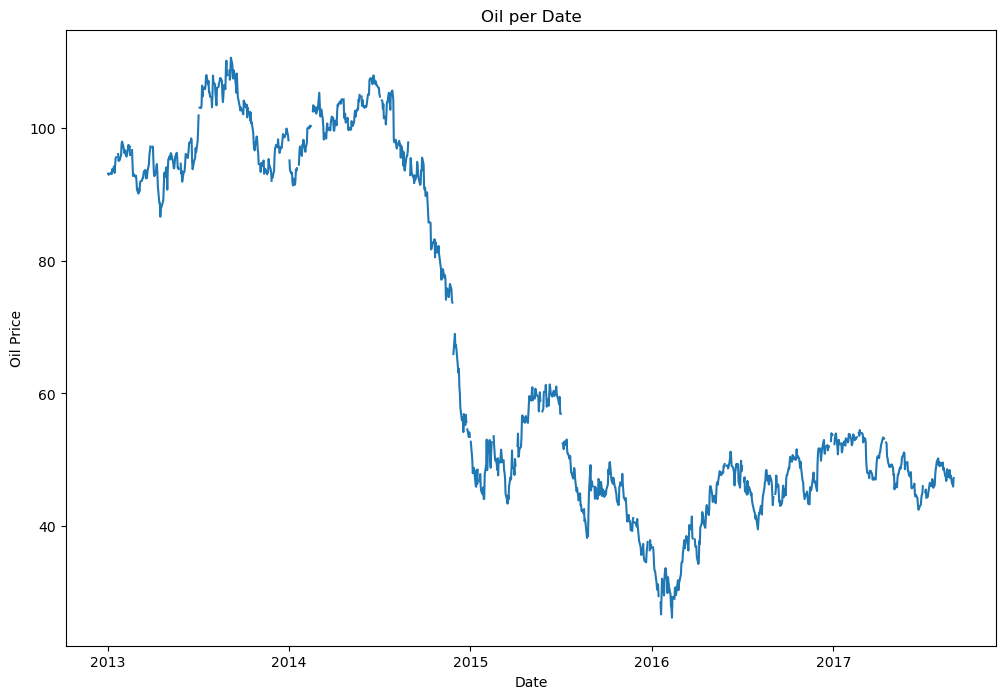

In [14]:
plt.figure(figsize = (12, 8))
plt.plot(df_oil['date'], df_oil['dcoilwtico'])
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil per Date')

2015쯤에 오일쇼크가 일어나 2016까지 유가가 내려가는 것을 볼 수 있다. 매출 간의 상관관계는 어떨까? (유가도 비율척도이기 때문에 피어슨 상관계수를 사용한다.)

In [15]:
df_oil_copy = df_oil.copy()
df_oil_copy["year"] = df_oil_copy.date.dt.year
df_oil_copy["month"] = df_oil_copy.date.dt.month
df_oil_copy = df_oil_copy.dropna()
df_oil_copy.dcoilwtico = df_oil_copy.dcoilwtico.astype("float16")

grouped_oil = df_oil_copy.groupby(['year', 'month'])['dcoilwtico'].sum().reset_index()
oil_list = grouped_oil.sort_values(['year', 'month'])['dcoilwtico'].tolist()
print(oil_list)

[1989.8125, 1810.75, 1858.6875, 2024.4375, 2079.1875, 1915.5625, 2302.75, 2344.625, 2126.0, 2312.25, 1877.3125, 2050.125, 1986.9375, 1915.4375, 2116.9375, 2143.5625, 2145.5625, 2221.5, 2279.0, 2027.25, 1957.4375, 1941.0625, 1440.0, 1304.4375, 944.40625, 961.0625, 1052.125, 1143.53125, 1185.25, 1316.0625, 1119.90625, 900.21875, 955.09375, 1016.9375, 848.84375, 818.1875, 601.96875, 606.46875, 825.9375, 855.90625, 980.96875, 1072.625, 893.0, 1028.625, 948.78125, 1045.28125, 958.8125, 1091.34375, 1050.0625, 1015.96875, 1134.625, 970.15625, 1066.53125, 993.9375, 886.0625, 1104.84375]


In [16]:
rho, p_val = stats.pearsonr(train_list, oil_list)
print("coef : {}, p-value : {}".format(rho, p_val))

coef : -0.7070339789251923, p-value : 1.125760509954114e-09


p값이 1을 넘어가 신뢰성 있는 결과가 나오지 않았다. 유의관계가 있다고 주장하는 가설은 기각된다.

이번엔 Onpromotion data를 시각화할 것이다.

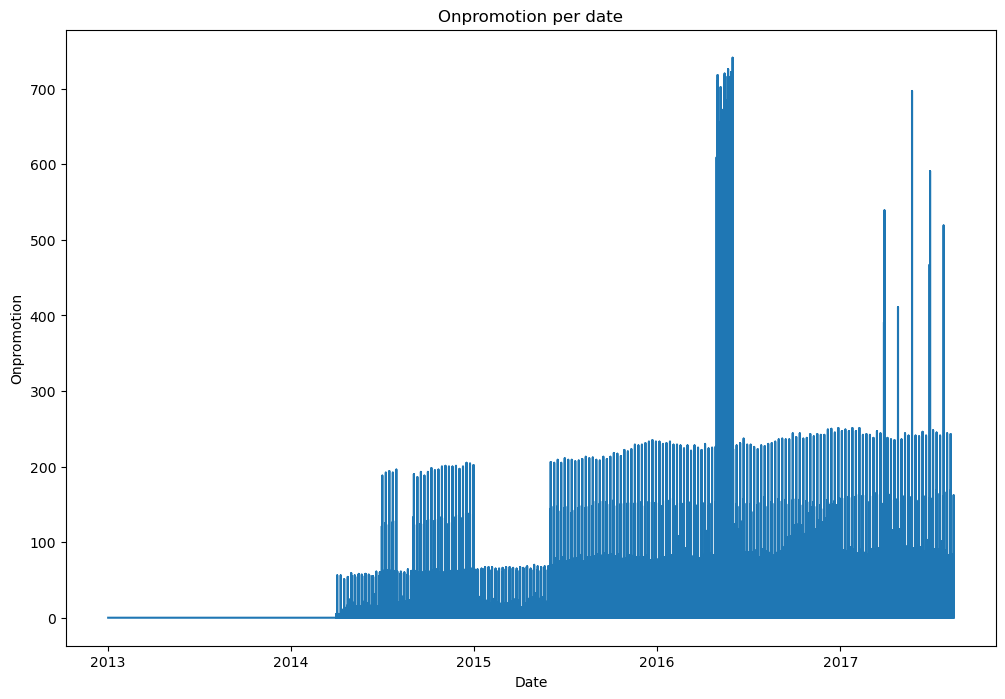

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(df_train['date'], df_train['onpromotion'])
plt.xlabel('Date')
plt.ylabel('Onpromotion')
plt.title("Onpromotion per date")
plt.show()

자료를 분석해보면, 2014년부터 홍보를 하면서 2016년부터 빈도를 늘리고, 2017년에도 가끔씩 홍보 빈도를 늘리는 것을 확인할 수 있다.
16년부터 급격한 상승이 있다는 점에서 매출액 그래프와 비슷해보이기 때문에 이 부분도 고려를 하면 좋을 듯 하다.

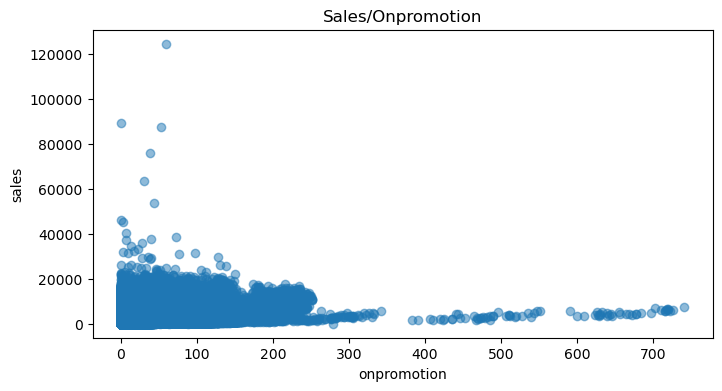

In [18]:
plt.figure(figsize=(8, 4))
plt.scatter(df_train['onpromotion'], df_train['sales'], alpha=0.5)
plt.title('Sales/Onpromotion')
plt.xlabel('onpromotion')
plt.ylabel('sales')
plt.show()

 그래프를 보면 promotion이 높다고 해서 매출이 높은 것은 아님을 확인할 수 있다.(비중요 데이터)

train.csv에 있는 family 항목은 어떨까?

<Axes: ylabel='family'>

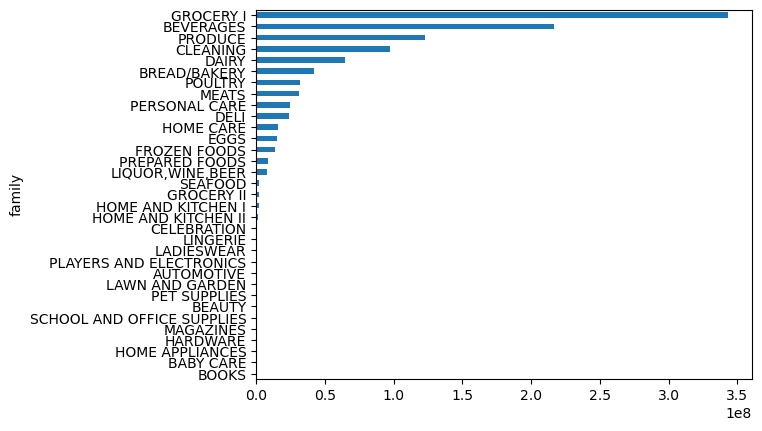

In [19]:
family_grouped = df_train.groupby('family')['sales'].sum()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
family_grouped = family_grouped.sort_values()
family_grouped.plot(kind='barh')

Grocery I가 압도적으로 많고, Beverages, Produce, Cleansing이 2, 3, 4위로 많은 비율을 차지하고 있다.

시간에 따른 판매 데이터도 분석해볼 것이다.

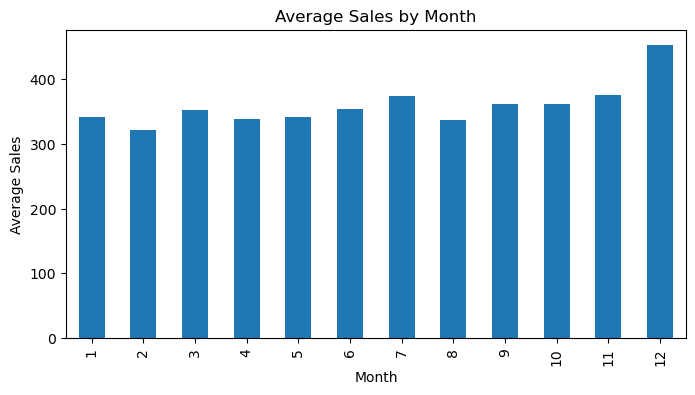

In [20]:
#https://www.kaggle.com/code/sangammahajan01/store-sales-lstm-forecasting 의 코드 참고함
df_train['month'] = df_train['date'].dt.month
plt.figure(figsize=(8, 4))
df_train.groupby('month')['sales'].mean().plot(kind='bar')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

12월이 매출이 높고(연말), 나머지 개월은 모두 비슷한 추이를 띄고 있는 것을 볼 수 있다.

<BarContainer object of 5 artists>

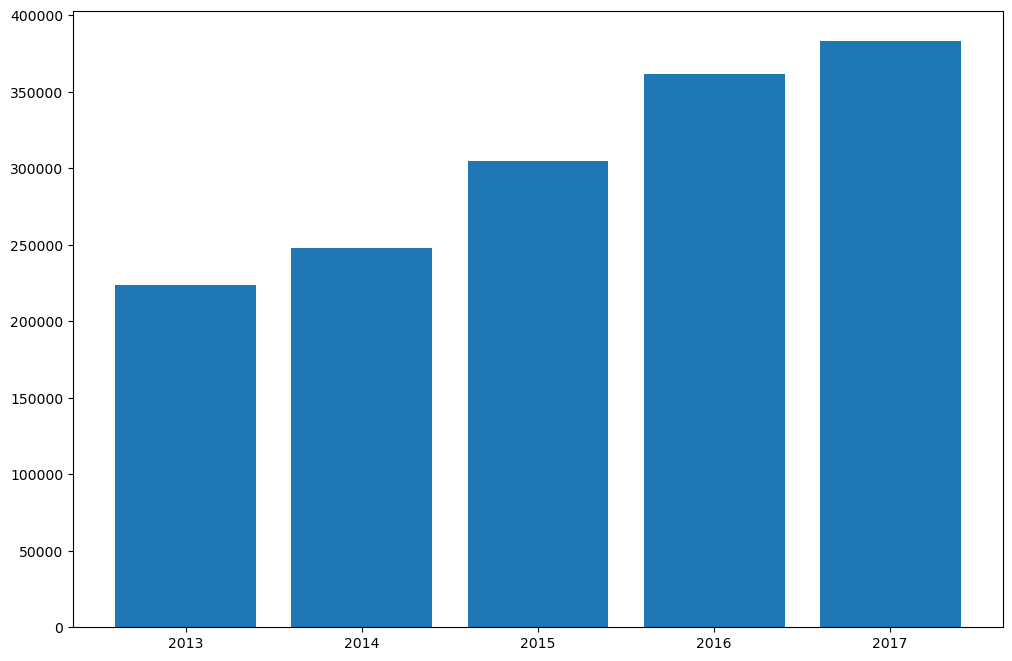

In [21]:
df_train['year'] = df_train['date'].dt.year
plt.figure(figsize = (12, 8))
grouped_train_copy = grouped_train.copy()
grouped_train_copy = grouped_train_copy.groupby('year').agg({"sales" : "mean"}).reset_index()
plt.bar(grouped_train_copy["year"], grouped_train_copy["sales"])

연간 매출은 시간을 거듭할수록 점점 증가하고 있음을 확인할 수 있다.

4. 머신러닝

이제 머신러닝을 통해 그 동안 얻었던 데이터를 하나씩 적용하여 매출을 예측할 것이다.

매출 데이터는 수치로 결과가 나오기 때문에 Classification이 아닌 Regression 방법을 사용하여 결과를 도출할 것이다.

우선, training data와 test data, predict data를 정의한다.

In [22]:
#training data 유력한게... date, month, family, transactions
merged_df = pd.merge(df_train, trans, on='date', how='right')
merged_df["new_date"] = (merged_df["date"] - merged_df["date"].min()).dt.days
df_data = np.array(merged_df[["new_date", "transactions"]])
df_data

array([[   0,  770],
       [   0,  770],
       [   0,  770],
       ...,
       [1687,  802],
       [1687,  802],
       [1687,  802]], dtype=int64)

In [24]:
y = np.array(merged_df["sales"])
print("")

array([   0.   ,    0.   ,    0.   , ..., 2419.729,  121.   ,   16.   ])

StandardScaler을 이용해 데이터를 표준화한다.

In [23]:
scaler = StandardScaler()
scaler.fit(df_data)
X_scaled = scaler.transform(df_data)

train data와 test data를 나눠준다.

In [24]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(df_data, y_encoded, test_size=0.2, random_state=42)

NameError: name 'y' is not defined

회귀분석을 실행하여 결과를 예측한다.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred